# <font color='blue'> Ciclo-1 end to end </font>

## 1.0 Data Informations

### 1.1 IMPORTS

In [142]:
import random


import numpy            as np
import pandas           as pd
import matplotlib       as plt
import seaborn          as sns 



from      imblearn     import              combine                  as     c
from      imblearn     import              over_sampling            as     oversamp
from      imblearn     import              under_sampling           as     us
from      scipy        import              stats                    as     ss
from      scikitplot   import              metrics                  as     mt
from      sklearn      import              metrics                  as     m
from      sklearn      import              preprocessing            as     pp
from      keras        import              layers                   as     l
from      keras        import              models                   as     ml
from      sklearn      import              model_selection          as     ms

### 1.2 Helper functions

In [2]:
def cramer_v( x, y ):
    cm  = pd.crosstab(x,y).values
    n  = cm.sum()
    r,k = cm.shape
    
    chi2      = ss.chi2_contingency(cm)[0]
    chi2corr  = max( 0, chi2 -  (k-1)*(r-1)/(n-1) )
    
    kcorr   =  k  - (k-1)**2/(n-1) 
    rcorr   =  r  - (r-1)**2/(n-1)
    
    return np.sqrt( ( chi2corr/n) / (min( kcorr-1 , rcorr-1 ) ) )

### 1.3 Loading data

In [3]:
# Users data
data_raw    = pd.read_csv('../dataset/training_users.csv', low_memory=True)

In [4]:
# Sessions data
df_sessions = pd.read_csv('../dataset/sessions.csv',low_memory=True)

## 2.0 Data Description 

### 2.1 Data Dimentions

In [5]:
#=================== Data Users ===================#
df1 = data_raw.copy()

In [6]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of rows: 213451
Number of columns: 16


In [7]:
    #=================== Data Sessions ===================#
dfs_1 = df_sessions.copy()

In [8]:
print( 'Number of rows: {}'.format( dfs_1.shape[0] ) )
print( 'Number of columns: {}'.format( dfs_1.shape[1] ) )

Number of rows: 10567737
Number of columns: 6


### 2.2 Data Type

In [9]:
# ================ Data Users================= # 
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [10]:
# ================ Data Sessions ================= #
dfs_1.dtypes

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

### 2.3 NA Check

In [11]:
        # ================Data Users================= #
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [12]:
# ================Data Sessions ================= #
dfs_1.isna().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [13]:
df1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [14]:
# Fill NA

##==================================      Users       ==================================##
# remove missing value completly
#df1 = df1.dropna()

# date_first_booking
date_first_booking_max = pd.to_datetime( df1['date_first_booking'] ).max().strftime( '%y-%m-%d' )
df1['date_first_booking'] = df1['date_first_booking'].fillna( date_first_booking_max )
# age
avg_age = df1['age'].mean().astype(int)
df1['age'] = df1['age'].fillna(avg_age)

# Tratando a Age 
df1 = df1[(df1['age']<120.0) & (df1['age']>15.0)]

# first_affiliate_tracked
df1 = df1[~df1['first_affiliate_tracked'].isna()]

##==================================      Sessions       ==================================##
# user_id
dfs_1 = dfs_1[~dfs_1['user_id'].isna()]
# action
dfs_1 = dfs_1[~dfs_1['action'].isna()]
# action_type
dfs_1 = dfs_1[~dfs_1['action_type'].isna()]
# action_detail
dfs_1 = dfs_1[~dfs_1['action_detail'].isna()]

# secs_elapsed
dfs_1 = dfs_1[~dfs_1['secs_elapsed'].isna()]
# Tratando a secs_elapsed
dfs_1 = dfs_1[dfs_1['secs_elapsed']>0]

In [15]:
df1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,15-06-29,-unknown-,49.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,15-06-29,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [16]:
##==================================    Training     ==================================##
df1.isna().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [17]:
##==================================      Sessions       ==================================##
dfs_1.isna().sum()/len(dfs_1)

user_id          0.0
action           0.0
action_type      0.0
action_detail    0.0
device_type      0.0
secs_elapsed     0.0
dtype: float64

### 2.4 Change data types

In [18]:
# date_account_created
df1['date_account_created'] = pd.to_datetime( df1['date_account_created'] )

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime( df1['timestamp_first_active'], format='%Y%m%d%H%M%S' )

# date_first_booking
df1['date_first_booking'] = pd.to_datetime( df1['date_first_booking'] )

# age
df1['age'] = df1['age'].astype( int )

In [19]:
df1['country_destination'].value_counts( normalize=True,ascending=True )

PT       0.001031
AU       0.002546
NL       0.003611
DE       0.005000
CA       0.006704
ES       0.010663
GB       0.011060
IT       0.013437
FR       0.023626
other    0.048090
US       0.294298
NDF      0.579933
Name: country_destination, dtype: float64

### 2.5 Check balanced data

### 2.6 Descriptive Analysis

In [20]:
#================= Data division =================#
# df1
num_attributes = df1.select_dtypes( include=['int64','float64'])
cat_attributes = df1.select_dtypes( exclude=['int64','float64','datetime64[ns]'])

# dfs_1
num_s_attributes = dfs_1.select_dtypes( include=['int64','float64'])
cat_s_attributes = dfs_1.select_dtypes( exclude=['int64','float64','datetime64[ns]'])


#### 2.6.1 Numerical - Users

In [21]:
# Central tendency- Mean, Median
ct1   =   pd.DataFrame( num_attributes.apply( np.mean  ) ).T
ct2   =   pd.DataFrame( num_attributes.apply( np.median  ) ).T

# Dispersion- Std, min, max, range, skew, kurtosis.
d1    =   pd.DataFrame( num_attributes.apply( np.std ) ).T
d2    =   pd.DataFrame( num_attributes.apply( lambda x: x.min( ) ) ).T
d3    =   pd.DataFrame( num_attributes.apply( lambda x: x.max( ) ) ).T
d4    =   pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() ) ).T
d5    =   pd.DataFrame(num_attributes.apply(lambda x: x.skew() ) ).T
d6    =   pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() ) ).T

# Concatenar
users_num = pd.concat( [d2,d3,d4,ct1,ct2,d1,d5,d6] ).T.reset_index()
users_num.columns = ['Atributos','Min','Max','Range','Mean','Median','Std','Skew','Kurtosis']
users_num

,Atributos,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,age,16.0,115.0,99.0,42.117424,49.0,12.156468,1.001974,4.626117
1,signup_flow,0.0,25.0,25.0,3.156946,0.0,7.550665,2.283784,3.551616


#### 2.6.2 Numerical - Sessions

In [22]:
# Central tendency- Mean, Median
cts1    =     pd.DataFrame( num_s_attributes.apply( np.mean ) ).T
cts2    =     pd.DataFrame( num_s_attributes.apply( np.median ) ).T

# Dispersion- Std, min, max, range, skew, kurtosis.
ds1     =   pd.DataFrame( num_s_attributes.apply( np.std ) ).T
ds2     =   pd.DataFrame( num_s_attributes.apply(lambda x: x.min() ) ).T
ds3     =   pd.DataFrame( num_s_attributes.apply( lambda x: x.max() ) ).T
ds4     =   pd.DataFrame( num_s_attributes.apply( lambda x: x.max() - x.min() ) ).T
ds5     =   pd.DataFrame( num_s_attributes.apply( lambda x: x.skew() ) ).T
ds6     =   pd.DataFrame( num_s_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenar
sessions_num = pd.concat( [ds2,ds3,ds4,cts1,cts2,ds1,ds5,ds6]).T.reset_index()
sessions_num.columns = ['Atributos','Min','Max','Range','Mean','Median','Std','Skew','Kurtosis']
sessions_num

,Atributos,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,secs_elapsed,1.0,1799977.0,1799976.0,20159.474341,1409.0,89265.854534,11.08481,153.3537


#### 2.6.3 Categorical-Users

In [23]:
cat_attributes.drop('id',axis=1).describe()

,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,206593,206593,206593,206593,206593,206593,206593,206593,206593,206593
unique,4,3,25,8,18,7,4,9,52,12
top,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,91706,147635,199636,133678,133438,108838,177591,89255,63620,119810


#### 2.6.4 Categorical-Sessions

In [24]:
cat_s_attributes.drop('user_id',axis=1).describe()

,action,action_type,action_detail,device_type
count,9123594,9123594,9123594,9123594
unique,347,10,155,14
top,show,view,view_search_results,Mac Desktop
freq,2161240,3518629,1754981,2989495


In [25]:
cat_attributes_list = cat_s_attributes.drop( 'user_id',axis=1).columns.tolist()

In [26]:
# Lista de attributos para o Cramer's V correlation
corr_dict = {}
for i in range (len( cat_attributes_list ) ):
    corr_list = []
    for j in range(len( cat_attributes_list ) ):
        ref  =  cat_attributes_list[i]
        feat =  cat_attributes_list[j]
        
        # Correlation
        corr = cramer_v( cat_s_attributes[ref], cat_s_attributes[feat])
        
        # Append da lista 
        corr_list.append( corr )
    
    # Append a correlation list for each ref attributes
    corr_dict[ ref ] = corr_list   
    

In [27]:
d = pd.DataFrame( corr_dict)
d = d.set_index( d.columns )
d

,action,action_type,action_detail,device_type
action,1.000019,0.951695,0.794873,0.259607
action_type,0.951695,1.000000,0.980597,0.082050
action_detail,0.794873,0.980597,1.000008,0.219253
device_type,0.259607,0.082050,0.219253,1.000001


<AxesSubplot:>

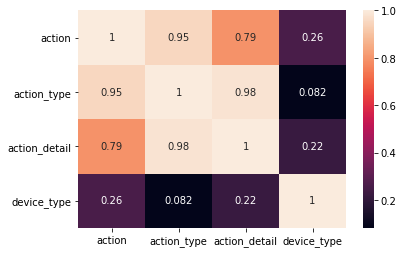

In [28]:
sns.heatmap( d ,annot=True )

## 3.0 Feature Engineering 

In [29]:
df2 = df1.copy()
dfs_2 = dfs_1.copy()

In [30]:
df2.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

### 3.1 Create New Features

In [31]:
# Days from first active up to first booking
df2['first_active'] = pd.to_datetime( df2['timestamp_first_active'].dt.strftime( '%Y-%m-%d' ) )
df2['days_from_first_active_until_booking'] = (df2['date_first_booking'] - df2['first_active']).apply(lambda x: x.days)
# Days from first active up to account created 
df2['days_from_first_active_until_account_created'] = (df2['date_account_created'] - df2['first_active']).apply(lambda x: x.days)
# Days from account created up to first booking 
df2['days_from_account_created_until_first_booking'] = (df2['date_first_booking'] - df2['date_account_created'] ).apply(lambda x: x.days)

#======================== First active ========================#
# year first active
df2['year_first_active'] = df2['first_active'].dt.year

# month first active
df2['month_first_active'] = df2['first_active'].dt.month

# day first active
df2['day_first_active'] = df2['first_active'].dt.day

# day of week first active
df2['dayofweek_first_active'] = df2['first_active'].dt.dayofweek

# week of year first active
df2['weekodyear_first_active'] = df2['first_active'].dt.weekofyear

#======================== First booking ========================#

# year first booking 
df2['year_first_booking'] = df2['date_first_booking'].dt.year

# month first booking
df2['month_first_booking'] = df2['date_first_booking'].dt.month

# day first booking
df2['day_first_booking'] = df2['date_first_booking'].dt.day

# day of week first active
df2['dayofweek_first_booking'] = df2['date_first_booking'].dt.dayofweek

# week of year first booking
df2['weekofyear_first_booking'] = df2['date_first_booking'].dt.weekofyear

#======================== First Account Created ========================#

# year First Account Created
df2['year_first_created_account'] = df2['date_account_created'].dt.year

# month First Account Created
df2['month_first_created_account'] = df2['date_account_created'].dt.month

# day First Account Created
df2['day_first_created_account'] = df2['date_account_created'].dt.day

# day of week First Account Created
df2['dayofweek_first_created_account'] = df2['date_account_created'].dt.dayofweek

# week of year First Account Created
df2['weekofyear_first_created_account'] = df2['date_account_created'].dt.weekofyear



<ipython-input-31-984f50c693cd>:23: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['weekodyear_first_active'] = df2['first_active'].dt.weekofyear
<ipython-input-31-984f50c693cd>:40: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['weekofyear_first_booking'] = df2['date_first_booking'].dt.weekofyear
<ipython-input-31-984f50c693cd>:57: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['weekofyear_first_created_account'] = df2['date_account_created'].dt.weekofyear


## 4.0 Data Filtering

In [164]:
df3 = df2.copy()

### 4.1 Filtering rows

In [165]:
# Limpando as linhas

### 4.2 Columns selection

In [166]:
cols = ['date_account_created','timestamp_first_active','date_first_booking','first_active'] # Original Datetime
df3  = df3.drop(cols,axis=1)

## 5.0 Balanced dataset

In [264]:
df4 = df3.copy()

In [265]:
# Encoder Categorical Variebles
ohe = pp.OneHotEncoder()

# Numerical
cols_num = df4.select_dtypes(include=['int64','float64']).columns.tolist()

# Categorical
cols_cat = df4.select_dtypes(exclude=['int64','float64','datetime64[ns]']).drop(['id','country_destination'],axis=1).columns.tolist()

## encoding
df4_dummy = pd.DataFrame(ohe.fit_transform(df4[cols_cat]).toarray(),index=df4.index)

# Join numerical and categorical
df42 = pd.concat([df4[cols_num],df4_dummy],axis=1)


### 5.1 Random Undersampling

In [243]:
60800*0.6

36480.0

In [266]:
# Ratio Balanced
ratio_balanced = {'NDF': 40000,
                   'US': 36480,}

# Definir o sampler
undersampling  = us.RandomUnderSampler( sampling_strategy=ratio_balanced, random_state=32 )


# Aplicar o sampler
x_under,y_under = undersampling.fit_resample( df42,df4['country_destination'] )




In [267]:
y_under.value_counts()

NDF      40000
US       36480
other     9935
FR        4881
IT        2776
GB        2285
ES        2203
CA        1385
DE        1033
NL         746
AU         526
PT         213
Name: country_destination, dtype: int64

In [254]:
df4['country_destination']

In [268]:
df4['country_destination'].value_counts()

NDF      119810
US        60800
other      9935
FR         4881
IT         2776
GB         2285
ES         2203
CA         1385
DE         1033
NL          746
AU          526
PT          213
Name: country_destination, dtype: int64

### 5.2 Random Oversampling

In [270]:
# Ratio Balanced
ratio_balanced = {'IT':4500,'GB':4000,'ES':4000,'CA':3000,'DE':3000,'NL':3000,'AU':2500,'PT':2000}

# Definir o sampler
oversamplig = oversamp.RandomOverSampler(sampling_strategy=ratio_balanced,random_state=32)

# Aplicar o sampler
x_over,y_over = oversamplig.fit_resample(df4,df4['country_destination'] )


In [271]:
df4['country_destination'].value_counts()

NDF      119810
US        60800
other      9935
FR         4881
IT         2776
GB         2285
ES         2203
CA         1385
DE         1033
NL          746
AU          526
PT          213
Name: country_destination, dtype: int64

In [272]:
df4['country_destination'].value_counts()

NDF      119810
US        60800
other      9935
FR         4881
IT         2776
GB         2285
ES         2203
CA         1385
DE         1033
NL          746
AU          526
PT          213
Name: country_destination, dtype: int64

In [273]:
y_over.value_counts()

NDF      119810
US        60800
other      9935
FR         4881
IT         4500
GB         4000
ES         4000
NL         3000
CA         3000
DE         3000
AU         2500
PT         2000
Name: country_destination, dtype: int64

### 5.3 SMOTE + TomekLink

In [311]:
ratio_balanced

{'other': 30000,
 'FR': 30000,
 'IT': 28999,
 'GB': 29000,
 'ES': 28000,
 'CA': 28000,
 'DE': 27000,
 'NL': 25000,
 'AU': 24000,
 'PT': 22000}

In [310]:
#df4['country_destination'].value_counts().to_dict()
ratio_balanced = {'other': int(3.019627579265224*9935),
                   'FR': int(6.146281499692686*4881),
                   'IT': int(10.446685878962535*2776),
                   'GB': int(12.691466083150985*2285),
                   'ES': int(12.70994098955969*2203),
                   'CA': int(20.216606498194945*1385),
                   'DE': int(26.137463697967085*1033),
                   'NL': int(33.51206434316354*746),
                   'AU': int(45.627376425855516*526),
                   'PT': int(103.28638497652582*213)}

In [312]:
# Ratio Balanced

# Definir o sampler
smt           = c.SMOTETomek(sampling_strategy=ratio_balanced,random_state=32,n_jobs=-1)


# Aplicar o sampler
x_smt,y_smt   = smt.fit_resample(df42,df4['country_destination'])



In [313]:
# Numerical data
df43 = x_smt[cols_num]


# Categorical data
df44 = x_smt.drop(cols_num,axis=1)
df45 = pd.DataFrame(ohe.inverse_transform(df44), columns=cols_cat,index=df44.index)


# Join numerical categorical
df46 = pd.concat([df43,df45],axis=1)
df46['country_destination']=y_smt



## 6.0 Data Preparation 

In [325]:
df5 = df4.copy()

In [326]:
#dummy variable
df5_dummy =   pd.get_dummies( df4.drop ( ['id','country_destination'] , axis=1 ) ) 

#join id and country destination
df5 = pd.concat( [df4 [['id','country_destination']] ,df5_dummy], axis=1 )

## 7.0 Feature Selection

In [330]:
df6 = df5.copy()

In [331]:
X = df6.drop( 'country_destination', axis=1 )
y = df6['country_destination'].copy()

In [332]:
# split dataset into training and test
X_train, X_test,y_train, y_test =  ms.train_test_split( X , y, test_size=0.2, random_state=32 )

## 8.0 Machine Learning Model

In [333]:
x_train = X_train.drop('id', axis=1)
x_test = X_test.drop('id', axis=1)

### 8.1 Baseline Model

In [334]:
country_destination_list = df1['country_destination'].drop_duplicates().sort_values().tolist()
k_num = y_test.shape[0]
country_destination_weights = df1['country_destination'].value_counts(normalize=True).sort_index().tolist()
#Model
y_hat_random = random.choices( population=country_destination_list,
                              weights = country_destination_weights,
                              k=k_num)

Accuracy :0.4259541615237542
Balanced accuracy : 0.08303746821828265
kappa score : -0.005381066422721403
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.01      0.01      0.01       265
          DE       0.02      0.02      0.02       234
          ES       0.00      0.01      0.00       385
          FR       0.02      0.02      0.02       971
          GB       0.01      0.01      0.01       457
          IT       0.01      0.01      0.01       553
         NDF       0.58      0.58      0.58     23927
          NL       0.00      0.00      0.00       143
          PT       0.00      0.00      0.00        54
          US       0.29      0.29      0.29     12249
       other       0.05      0.05      0.05      1980

    accuracy                           0.43     41319
   macro avg       0.08      0.08      0.08     41319
weighted avg       0.42      0.43      0.42     41319



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

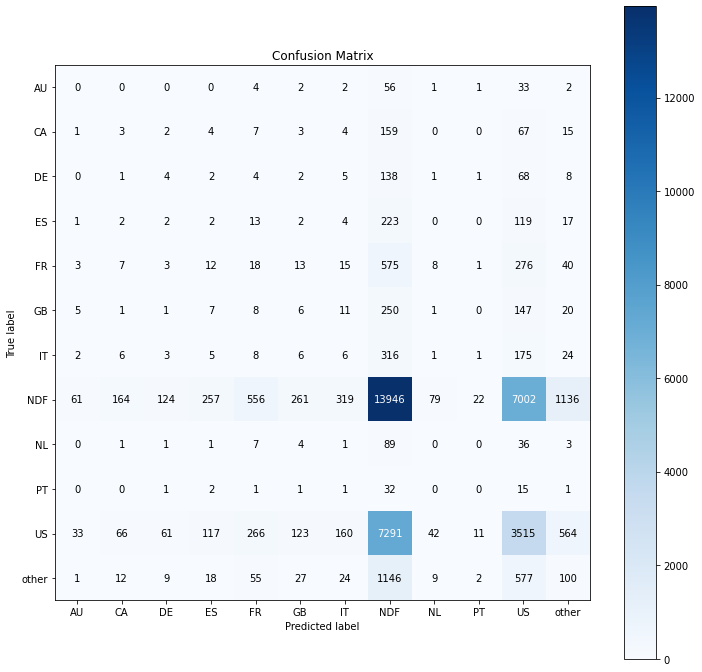

In [335]:
acc_random = m.accuracy_score( y_test, y_hat_random )
print('Accuracy :{}'.format(acc_random ) )

# Balanced accuracy
balanced_accuracy_random = m.balanced_accuracy_score(y_test, y_hat_random)
print('Balanced accuracy : {}'.format( balanced_accuracy_random ))


# Kappa Metrics
kappa_random = m.cohen_kappa_score(y_test, y_hat_random)
print('kappa score : {}'.format( kappa_random ))

# classification report
print(m.classification_report( y_test, y_hat_random ))

#Confusion Matrix 
mt.plot_confusion_matrix( y_test, y_hat_random, normalize=False , figsize=(12,12) )


### 8.1 Neural Network -MLP

In [336]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1,1)).toarray()

In [341]:
#model definition
model = ml.Sequential()
model.add( l.Dense( 256, input_dim= x_train.shape[1], activation='relu' ) )
model.add( l.Dense( 12, activation='softmax' ) )

#model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

#train model
model.fit( x_train, y_train_nn, epochs=50 )

Epoch 1/50
5165/5165 [==============================] - 4s 766us/step - loss: 8.4694 - accuracy: 0.7920
Epoch 2/50
5165/5165 [==============================] - 4s 769us/step - loss: 1.4238 - accuracy: 0.8192
Epoch 3/50
5165/5165 [==============================] - 4s 770us/step - loss: 0.6450 - accuracy: 0.8539
Epoch 4/50
5165/5165 [==============================] - 4s 788us/step - loss: 0.5046 - accuracy: 0.8745
Epoch 5/50
5165/5165 [==============================] - 4s 851us/step - loss: 0.4978 - accuracy: 0.8731
Epoch 6/50
5165/5165 [==============================] - 4s 798us/step - loss: 0.5006 - accuracy: 0.8720
Epoch 7/50
5165/5165 [==============================] - 4s 784us/step - loss: 0.4931 - accuracy: 0.8747
Epoch 8/50
5165/5165 [==============================] - 4s 782us/step - loss: 0.4970 - accuracy: 0.8724
Epoch 9/50
5165/5165 [==============================] - 4s 768us/step - loss: 0.4964 - accuracy: 0.8727
Epoch 10/50
5165/5165 [==============================] - 4s 790u

### 8.1.2 NN Performance

In [338]:
#prediction
pred_nn = model.predict( x_test )

#invert prediction
y_hat_nn = ohe.inverse_transform( pred_nn )

#prediction prepare
y_test_nn = y_test.to_numpy()
y_hat_nn = y_hat_nn.reshape( 1 , -1)[0] 

Accuracy :0.8755294174592803
Balanced accuracy : 0.16666666666666666
kappa score : 0.7694497945406258


/home/tulio/.pyenv/versions/3.8.0/envs/projetosportfolio/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tulio/.pyenv/versions/3.8.0/envs/projetosportfolio/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tulio/.pyenv/versions/3.8.0/envs/projetosportfolio/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.00      0.00      0.00       265
          DE       0.00      0.00      0.00       234
          ES       0.00      0.00      0.00       385
          FR       0.00      0.00      0.00       971
          GB       0.00      0.00      0.00       457
          IT       0.00      0.00      0.00       553
         NDF       1.00      1.00      1.00     23927
          NL       0.00      0.00      0.00       143
          PT       0.00      0.00      0.00        54
          US       0.70      1.00      0.83     12249
       other       0.00      0.00      0.00      1980

    accuracy                           0.88     41319
   macro avg       0.14      0.17      0.15     41319
weighted avg       0.79      0.88      0.82     41319



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

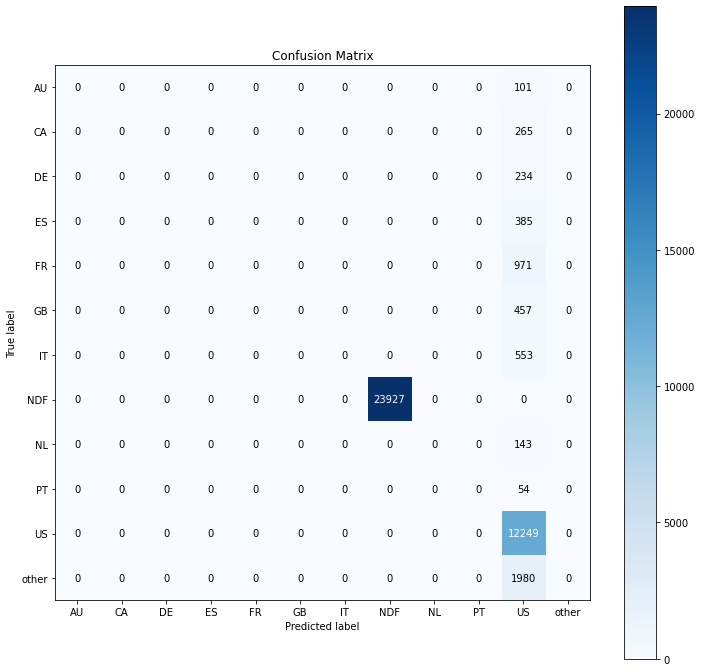

In [339]:
#Accuracy
acc_nn = m.accuracy_score( y_test_nn, y_hat_nn )
print('Accuracy :{}'.format(acc_nn))

# Balanced accuracy
balanced_accuracy_nn = m.balanced_accuracy_score(y_test_nn, y_hat_nn)
print('Balanced accuracy : {}'.format( balanced_accuracy_nn ))


# Kappa Metrics
kappa_nn = m.cohen_kappa_score(y_test_nn, y_hat_nn)
print('kappa score : {}'.format( kappa_nn ))

# classification report
print(m.classification_report( y_test_nn, y_hat_nn ))

#Confusion Matrix 
mt.plot_confusion_matrix( y_test_nn, y_hat_nn, normalize=False , figsize=(12,12) )


### 8.1.3 NN Performance - Cross Validation

In [342]:
# Generate k-fold
num_folds = 5 
kfold = ms.StratifiedKFold(n_splits=num_folds, shuffle=True ,random_state=32)
kfold.split( x_train, y_train )


balanced_acc_list = [] 
kappa_acc_list    = []

i = 1
for train_ix, val_ix in kfold.split(x_train,y_train):
    print('Fold Number : {}/{}'.format( i , num_folds ))
    # get fold
    x_train_fold  = x_train.iloc[train_ix]
    y_train_fold  = y_train.iloc[train_ix]
    
    x_val_fold    = x_train.iloc[val_ix]
    y_val_fold    = y_train.iloc[val_ix]
    
    # Target Definition
    
    ohe = pp.OneHotEncoder()
    y_train_fold_nn = ohe.fit_transform( y_train_fold.values.reshape( -1,1 ) ).toarray()

    
    # Model definition
    model = ml.Sequential()
    model.add( l.Dense( 256, input_dim=x_train.shape[1], activation='relu' ) )
    model.add( l.Dense( 12,  activation='softmax') )
    
    # Compile Model
    model.compile( loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])    
    
    
    # Trainig model 
    model.fit( x_train_fold, y_train_fold_nn, epochs=100, batch_size=32,verbose=0 )
    
    
    # Prediction
    pred_nn  = model.predict(x_val_fold)
    y_hat_nn = ohe.inverse_transform(pred_nn)
    
    
    #prepare data
    y_test_nn  = y_val_fold.to_numpy()
    y_hat_nn  = y_hat_nn.reshape( 1 , -1 )[0]
    
    # Metrics
    ## Balanced Accuracy
    balanced_acc_nn   =  m.balanced_accuracy_score( y_test_nn, y_hat_nn)
    balanced_acc_list.append(balanced_acc_nn) 
    ## Kappa Metrics
    kappa_acc_nn    =  m.cohen_kappa_score( y_test_nn, y_hat_nn)
    kappa_acc_list.append( kappa_acc_nn )
    
    
    i+=1

Fold Number : 1/5
Fold Number : 2/5
Fold Number : 3/5
Fold Number : 4/5
Fold Number : 5/5


In [343]:
print('Avg Balanced accuracy: {}  +/- {}'.format(np.round( np.mean( balanced_acc_list ),3),
                                                 np.round(np.std  ( balanced_acc_list ),4)))
print('Avg Kappa:             {}  +/- {}'.format( np.round ( np.mean ( kappa_acc_list ),3 ),
                                                  np.round ( np.std  ( kappa_acc_list ),3 ) ))

Avg Balanced accuracy: 0.167  +/- 0.0
Avg Kappa:             0.767  +/- 0.0
